# Wrangler and Analyse data

### by Istam Kulliev

# Introduction

 The purpose of the study was to determine the rating based on the likes collected from dogs on Twitter.
 
 Based on this database, the dog ratings were analyzed. It tracked the different breeds of dogs available on Twitter and their ratings.

My tasks in this project are as follows:
-	Data wrangling, which consists of:
	Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
-	Assessing data
-	Cleaning data
-	Storing, analyzing, and visualizing your wrangled data
-	Reporting on 

1) data wrangling efforts

2) data analyses and visualizations


### Gathering data

The WeRateDogs Twitter archive is provided in twitter_archive_enhanced.csv. We collect the necessary data from this database.

Use the Requests library Udacity's servers and should be downloaded programmatically the following URL:

https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Using query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data.



In [172]:
#Import all packages need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import re
import json
import time
import seaborn as sb
from IPython.display import Image
import tweepy

In [173]:
# read csv file and information about data 
df = pd.read_csv('twitter-archive-enhanced.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [174]:
# Inforamtion about data twitter-archive-enhanced.csv.
print("Rows: {}\nColumns: {}".
      format(*df.shape))

Rows: 2356
Columns: 17


This data consists of a total of 2356 rows and 17 columns. 

In [175]:
# Information about columns the dataset
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [176]:
# Print the number of unique values for each variable.
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [177]:
# we describe date  
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [178]:
df['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

# 2. Tweet image prediction

In [179]:
# Download programmatically using the Requests library and the following 
# URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
# from Udacity's servers
# Information about tweet image prediction

downloaded_response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image-predictions.tsv', 'wb') as file:
    file.write(downloaded_response.content)

# Put contents of the downloaded file into a data frame, using the read_csv-function. 
# A tsv-file differs only by the separator from a csv-file.
    df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')    

In [180]:
print(df_image_predictions)

                tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2

In [181]:
# print the first 2 rows data.
df_image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [182]:
# Information about data image_prediction
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [184]:
# Look duplicated data
sum(df_image_predictions.jpg_url.duplicated())

66

In [185]:
# Concation images dogs 
pd.concat(i for _, i in df_image_predictions.groupby("jpg_url") if len(i) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [186]:
# Look information count images dogs 
df_image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Twitter's API

In [189]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [205]:
df_list = []
error_list = []

start = time.time()

# Will add each available tweet json to df_list
for tweet_id in df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit = True,
                               wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # tweet's favorites
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] # user's favorites
        date_time = tweet['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id), 'favorites': int(favorites), 'retweets': int(retweets),
                        'user_followers': int(user_followers), 'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception as e:
        print(str(tweet_id)+ " __ " + str(e))
        error_list.append(tweet_id)
        

end = time.time()
print(end - start)

892420643555336193 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
892177421306343426 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
891815181378084864 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
891689557279858688 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
891327558926688256 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
891087950875897856 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
890971913173991426 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
890729181411237888 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
890609185150312448 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
890240255349198849 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
890006608113172480 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
889880896479866881 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
889665388333682689 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

871762521631449091 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
871515927908634625 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
871166179821445120 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
871102520638267392 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
871032628920680449 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
870804317367881728 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
870726314365509632 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
870656317836468226 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
870374049280663552 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
870308999962521604 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
870063196459192321 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
869988702071779329 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
869772420881756160 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

851464819735769094 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
851224888060895234 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
850753642995093505 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
850380195714523136 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
850333567704068097 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
850145622816686080 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
850019790995546112 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
849776966551130114 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
849668094696017920 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
849412302885593088 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
849336543269576704 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
849051919805034497 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
848690551926992896 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

834209720923721728 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
834167344700198914 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
834089966724603904 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
834086379323871233 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
833863086058651648 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
833826103416520705 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
833732339549220864 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
833722901757046785 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
833479644947025920 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
833124694597443584 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
832998151111966721 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
832769181346996225 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
832757312314028032 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

821149554670182400 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
821107785811234820 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
821044531881721856 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
820837357901512704 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
820749716845686786 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
820690176645140481 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
820494788566847489 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
820446719150292993 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
820314633777061888 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
820078625395449857 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
820013781606658049 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
819952236453363712 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
819924195358416896 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

807059379405148160 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
807010152071229440 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
806629075125202948 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
806620845233815552 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
806576416489959424 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
806542213899489280 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
806242860592926720 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
806219024703037440 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
805958939288408065 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
805932879469572096 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
805826884734976000 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
805823200554876929 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
805520635690676224 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

793210959003287553 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
793195938047070209 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
793180763617361921 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
793165685325201412 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
793150605191548928 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
793135492858580992 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
793120401413079041 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
792913359805018113 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
792883833364439040 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
792773781206999040 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
792394556390137856 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
792050063153438720 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
791821351946420224 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

779124354206535695 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
779123168116150273 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
779056095788752897 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
778990705243029504 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
778774459159379968 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
778764940568104960 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
778748913645780993 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
778650543019483137 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
778624900596654080 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
778408200802557953 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
778396591732486144 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
778383385161035776 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
778286810187399168 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

764259802650378240 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
763956972077010945 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
763837565564780549 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
763183847194451968 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
763167063695355904 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
763103485927849985 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
762699858130116608 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
762471784394268675 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
762464539388485633 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
762316489655476224 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
762035686371364864 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
761976711479193600 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
761750502866649088 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

750719632563142656 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750506206503038976 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750429297815552001 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750383411068534784 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750381685133418496 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750147208377409536 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750132105863102464 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750117059602808832 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750101899009982464 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750086836815486976 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750071704093859840 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750056684286914561 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
750041628174217216 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

740359016048689152 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
740214038584557568 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
739979191639244800 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
739932936087216128 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
739844404073074688 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
739623569819336705 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
739606147276148736 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
739544079319588864 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
739485634323156992 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
739238157791694849 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
738891149612572673 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
738885046782832640 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
738883359779196928 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

719704490224398336 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
719551379208073216 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
719367763014393856 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
719339463458033665 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
719332531645071360 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
718971898235854848 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
718939241951195136 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
718631497683582976 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
718613305783398402 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
718540630683709445 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
718460005985447936 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
718454725339934721 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
718246886998687744 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

708479650088034305 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
708469915515297792 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
708400866336894977 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
708356463048204288 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
708349470027751425 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
708149363256774660 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
708130923141795840 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
708119489313951744 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
708109389455101952 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
708026248782585858 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
707995814724026368 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
707983188426153984 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
707969809498152960 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

700143752053182464 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
700062718104104960 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
700029284593901568 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
700002074055016451 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
699801817392291840 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
699788877217865730 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
699779630832685056 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
699775878809702401 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
699691744225525762 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
699446877801091073 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
699434518667751424 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
699423671849451520 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
699413908797464576 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

692417313023332352 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
692187005137076224 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
692158366030913536 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
692142790915014657 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
692041934689402880 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
692017291282812928 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
691820333922455552 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
691793053716221953 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
691756958957883396 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
691675652215414786 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
691483041324204033 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
691459709405118465 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
691444869282295808 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

685681090388975616 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685667379192414208 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685663452032069632 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685641971164143616 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685547936038666240 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685532292383666176 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685325112850124800 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685321586178670592 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685315239903100929 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685307451701334016 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685268753634967552 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685198997565345792 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
685169283572338688 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

680494726643068929 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680473011644985345 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680440374763077632 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680221482581123072 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680206703334408192 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680191257256136705 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680176173301628928 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680161097740095489 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680145970311643136 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680130881361686529 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680115823365742593 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680100725817409536 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
680085611152338944 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

676590572941893632 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676588346097852417 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676582956622721024 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676575501977128964 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676533798876651520 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676496375194980353 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676470639084101634 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676440007570247681 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676430933382295552 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676263575653122048 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676237365392908289 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676219687039057920 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
676215927814406144 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

674053186244734976 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
674051556661161984 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
674045139690631169 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
674042553264685056 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
674038233588723717 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
674036086168010753 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
674024893172875264 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
674019345211760640 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
674014384960745472 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
674008982932058114 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
673956914389192708 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
673919437611909120 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
673906403526995968 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

671744970634719232 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671743150407421952 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671735591348891648 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671729906628341761 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671561002136281088 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671550332464455680 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671547767500775424 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671544874165002241 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671542985629241344 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671538301157904385 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671536543010570240 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671533943490011136 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
671528761649688577 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

670003130994700288 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669993076832759809 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669972011175813120 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669970042633789440 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669942763794931712 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669926384437997569 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669923323644657664 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669753178989142016 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669749430875258880 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669684865554620416 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669683899023405056 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669682095984410625 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
669680153564442624 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

667873844930215936 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667866724293877760 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667861340749471744 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667832474953625600 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667806454573760512 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667801013445750784 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667793409583771648 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667782464991965184 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667773195014021121 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667766675769573376 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667728196545200128 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667724302356258817 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
667550904950915073 __ [{'code': 215, 'message': 'Bad Authentication data.'}]

666029285002620928 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
666020888022790149 __ [{'code': 215, 'message': 'Bad Authentication data.'}]
1483.0055077075958


In [206]:
len(error_list)

2356

In [207]:
len(df_list)

0

In [128]:
# downloaded and  add them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [198]:
from timeit import default_timer as timer
count = 0
tweet_ids = df.tweet_id.values
len(tweet_ids)
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success"),
            #json.dump(tweet_jsonnew.txt, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

In [200]:
len(tweet_ids)

2356

In [203]:
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

EmptyDataError: No columns to parse from file

# Assessing data

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.


In [27]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [42]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [43]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35246,7433,8945541,18,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30513,5527,8945540,18,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22942,3647,8945540,18,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38523,7610,8945541,18,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36800,8192,8945541,18,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...
2190,666049248165822465,94,39,8946053,18,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2191,666044226329800704,263,123,8946053,18,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2192,666033412701032449,108,39,8946053,18,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2193,666029285002620928,118,41,8946052,18,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [46]:
sum(df['tweet_id'].duplicated())

0

In [47]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [51]:
print(df.loc[df.rating_numerator == 17, 'text']) 
print(df.loc[df.rating_numerator == 27, 'text']) 
print(df.loc[df.rating_numerator == 88, 'text']) 
print(df.loc[df.rating_numerator == 99, 'text'])
print(df.loc[df.rating_numerator == 121, 'text'])

55    @roushfenway These are good dogs but 17/10 is ...
Name: text, dtype: object
763    This is Sophie. She's a Jubilant Bush Pupper. ...
Name: text, dtype: object
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object
1228    Happy Saturday here's 9 puppers on a bench. 99...
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several...
Name: text, dtype: object


In [53]:
#print whole text in order to verify numerators and denominators
print(df['text'][55]) 
print(df['text'][763])
print(df['text'][1843])
print(df['text'][1228])
print(df['text'][1635])

@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55


In [54]:
with pd.option_context('max_colwidth', 200):
    display(df[df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [55]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1951,863432100342583297,https://pbs.twimg.com/media/C_uG6eAUAAAvMvR.jpg,1,Staffordshire_bullterrier,0.690517,True,French_bulldog,0.103360,True,beagle,0.079489,True
500,675845657354215424,https://pbs.twimg.com/media/CWEWClfW4AAnqhG.jpg,1,pug,0.883952,True,Boston_bull,0.011057,True,French_bulldog,0.009840,True
411,673906403526995968,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,1,toilet_seat,0.683319,False,soft-coated_wheaten_terrier,0.048928,True,Siberian_husky,0.030386,True
74,667393430834667520,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,1,papillon,0.557009,True,Border_collie,0.271963,True,collie,0.073473,True
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,chow,0.279101,True,Pomeranian,0.076922,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
567,678341075375947776,https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg,1,golden_retriever,0.853284,True,cocker_spaniel,0.026230,True,Labrador_retriever,0.024123,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True
920,701952816642965504,https://pbs.twimg.com/media/Cb3WXMUUMAIuzL8.jpg,1,toy_poodle,0.331707,True,miniature_poodle,0.272485,True,standard_poodle,0.169415,True
1096,720059472081784833,https://pbs.twimg.com/media/Cf4qRcmWEAA9V4h.jpg,1,Mexican_hairless,0.451852,True,redbone,0.254884,True,Italian_greyhound,0.094818,True


In [56]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [57]:
sum(image_prediction.jpg_url.duplicated())

66

In [58]:
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [59]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [60]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2195 non-null   object
 1   favorite_count    2195 non-null   int64 
 2   retweet_count     2195 non-null   int64 
 3   followers_count   2195 non-null   int64 
 4   friends_count     2195 non-null   int64 
 5   source            2195 non-null   object
 6   retweeted_status  2195 non-null   object
 7   url               2195 non-null   object
dtypes: int64(4), object(4)
memory usage: 137.3+ KB


In [61]:
tweet_json.retweeted_status.value_counts()

Original tweet       2033
This is a retweet     162
Name: retweeted_status, dtype: int64

In [62]:
tweet_json.source.value_counts()

Twitter for iPhone     2073
Vine - Make a Scene      79
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

# Cleaning Data

In [65]:
twitter_archive_clean = df.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

In [66]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#TEST
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


In [67]:
#get the column names of twitter_archive_clean
print(list(twitter_archive_clean))

twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [68]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [69]:

twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_stage')

# drop dogs
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

# Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [70]:
#TEST
twitter_archive_clean['dogs_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

In [71]:
# convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#Finally drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

In [72]:
# list twitter_archive_clean
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

In [73]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   dogs_stage          2175 non-null   object 
 6   year                2175 non-null   int64  
 7   month               2175 non-null   int64  
 8   day                 2175 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 169.9+ KB


In [74]:
#First change numerator and denominators type int to float to allow decimals 
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


In [75]:
# Update both numerators and denominators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])



,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
3839,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0
2538,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0


In [77]:
#Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)
twitter_archive_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
3398,699423671849451520,"""Don't ever talk to me or my son again."" ...bo...",10.0,10.0,None,None,2016,2,16,10.0
2358,851464819735769094,This is Iggy. He was a rescue dog killed in th...,14.0,10.0,Iggy,None,2017,4,10,14.0
3433,697242256848379904,This is Oakley. He has a massive tumor growing...,10.0,10.0,Oakley,None,2016,2,10,10.0
2372,848212111729840128,This is Jerry. He's doing a distinguished tong...,6.0,10.0,Jerry,None,2017,4,1,6.0
4200,668636665813057536,This is an Irish Rigatoni terrier named Berta....,10.0,10.0,an,None,2015,11,23,10.0
2117,667070482143944705,After much debate this dog is being upgraded t...,10.0,10.0,None,None,2015,11,18,10.0
2386,845812042753855489,We usually don't rate polar bears but this one...,13.0,10.0,None,None,2017,3,26,13.0
3368,702217446468493312,"I know it's tempting, but please stop sending ...",9.0,10.0,None,None,2016,2,23,9.0
3216,714631576617938945,This is Benedict. He's a feisty pup. Needs a b...,4.0,10.0,Benedict,None,2016,3,29,4.0
29,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,12.0,10.0,None,None,2017,7,15,12.0


In [78]:
# Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')
sum(image_prediction_clean['jpg_url'].duplicated())

0

In [79]:
# the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []
#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [103]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

#TEST: 
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1691 non-null   int64 
 1   jpg_url          1691 non-null   object
 2   dog_type         1691 non-null   object
 3   confidence_list  1691 non-null   object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


In [104]:
print(list(image_prediction_clean))

['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']


In [82]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2033
Name: retweeted_status, dtype: int64

In [112]:
tweet_json_clean['tweet_id'].dtypes

dtype('O')

In [126]:
#image_prediction_clean
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


In [106]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2033
Name: retweeted_status, dtype: int64

In [113]:
# create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])
# keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


In [137]:
df_twitter1['rating_numerator'].value_counts()

12.00     404
10.00     354
11.00     342
13.00     212
9.00      133
8.00       68
7.00       31
14.00      22
6.00       16
5.00       13
4.00        6
3.00        5
2.00        2
13.50       2
44.00       1
143.00      1
99.00       1
45.00       1
60.00       1
144.00      1
88.00       1
84.00       1
9.75        1
0.00        1
11.26       1
165.00      1
11.27       1
121.00      1
80.00       1
Name: rating_numerator, dtype: int64

In [139]:
#Store the clean DataFrame in a CSV file
df_twitter1.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [140]:
df_twitter1['dog_type'].value_counts()

golden_retriever      142
Labrador_retriever    103
Pembroke               94
Chihuahua              87
pug                    60
                     ... 
silky_terrier           1
Irish_wolfhound         1
Japanese_spaniel        1
clumber                 1
standard_schnauzer      1
Name: dog_type, Length: 113, dtype: int64

# PLOTLY

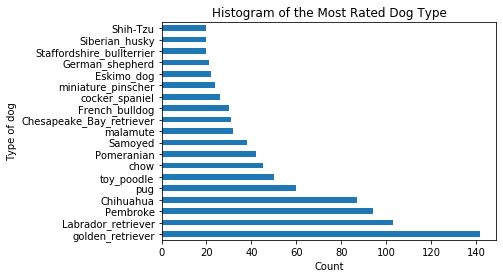

In [143]:
df_dog_type = df_twitter1.groupby('dog_type').filter(lambda x: len(x) >= 20)
df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [145]:
df_dog_type_mean = df_twitter1.groupby('dog_type').mean()

In [146]:
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day,rating
dog_type,,,,,,,
Afghan_hound,8.095999e+17,8.000000,10.0,2016.500000,6.00,16.000000,8.000000
Airedale,7.184489e+17,9.833333,10.0,2015.583333,8.75,15.916667,9.833333
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,2016.187500,5.25,15.000000,10.312500
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.50,18.500000,11.000000
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.50,7.000000,11.500000


In [147]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()
df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
                                 ...    
Border_terrier                 12.142857
Irish_setter                   12.333333
briard                         12.333333
Saluki                         12.500000
Bouvier_des_Flandres           13.000000
Name: rating, Length: 113, dtype: float64

In [151]:
df_twitter1[df_twitter1['dog_type'] == 'golden_retriever']

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,confidence_list
10,667530908589760512,Meet Naphaniel. He doesn't necessarily enjoy h...,10.0,10.0,Naphaniel,None,2015,11,20,10.0,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,golden_retriever,0.633037
43,667044094246576128,12/10 gimme now https://t.co/QZAnwgnOMB,12.0,10.0,None,None,2015,11,18,12.0,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.765266
52,667160273090932737,This is Bradlay. He is a Ronaldinho Matsuyama ...,11.0,10.0,Bradlay,None,2015,11,19,11.0,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,golden_retriever,0.471351
58,667182792070062081,This is Timison. He just told an awful joke bu...,10.0,10.0,Timison,None,2015,11,19,10.0,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,golden_retriever,0.949892
62,667211855547486208,This is Genevieve. She is a golden retriever c...,9.0,10.0,Genevieve,None,2015,11,19,9.0,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,golden_retriever,0.462556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,693262851218264065,I hope you guys enjoy this beautiful snowy pup...,11.0,10.0,None,pupper,2016,1,30,11.0,https://pbs.twimg.com/media/CZ724fDUYAAytS-.jpg,golden_retriever,0.989333
2123,675740360753160193,Here's a pupper licking in slow motion. 12/10 ...,12.0,10.0,None,pupper,2015,12,12,12.0,https://pbs.twimg.com/ext_tw_video_thumb/67574...,golden_retriever,0.800495
2134,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12.0,10.0,Maggie,pupper,2016,7,31,12.0,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,golden_retriever,0.985876
2158,859607811541651456,Sorry for the lack of posts today. I came home...,13.0,10.0,None,puppo,2017,5,3,13.0,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,golden_retriever,0.895529


# Visualization

In [152]:
df_dog_type_count = df_twitter1.groupby('dog_type').count()
df_dog_type_count

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,confidence_list
dog_type,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,50,50,50,50,50,50,50,50,50,50,50,50
toy_terrier,3,3,3,3,3,3,3,3,3,3,3,3
vizsla,13,13,13,13,13,13,13,13,13,13,13,13


In [153]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_type
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
                                    ...    
toy_poodle                        11.020000
toy_terrier                       10.333333
vizsla                            10.846154
whippet                           10.181818
wire-haired_fox_terrier           11.500000
Name: rating, Length: 113, dtype: float64

In [154]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
...,...,...
toy_poodle,50,11.020000
toy_terrier,3,10.333333
vizsla,13,10.846154


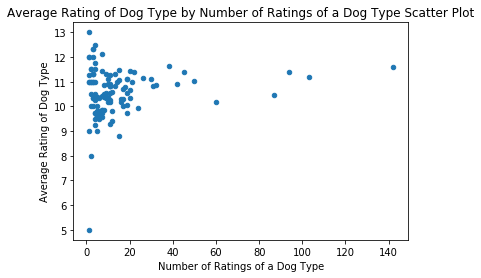

In [155]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
fig.savefig('output2.png',bbox_inches='tight');

The high ratings do not receive the most retweets.

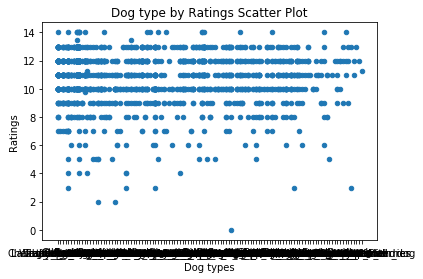

In [170]:
df_dog_type = df_twitter1.groupby('dog_type').filter(lambda x: len(x) >= 30)
df_twitter1.plot(x='dog_type', y='rating', kind='scatter')
plt.xlabel('Dog types')
plt.ylabel('Ratings')
plt.title('Dog type by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output10.png',bbox_inches='tight');

In [37]:
# Sum the number of rows with duplicated entries.
duplic = sum(df.duplicated())
print("Number of duplicated rows: {}".format(duplic))

Number of duplicated rows: 0
